In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('Files/DatosParaCompartir.csv', sep=';')
df.columns = df.iloc[0]  # Usar la primera fila como encabezado
df = df[1:].reset_index(drop=True)
df = df[[df.columns[0], 'GHI']].rename(columns={df.columns[0]: 't', 'GHI': 'GHI'})
df.head()


/var/folders/nk/w8qn8x117q3b8_dl48mq47640000gn/T/ipykernel_10011/2280247033.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Files/DatosParaCompartir.csv', sep=';')


,t,GHI
0,2022-02-21 18:00:00+00:00,3.0352
1,2022-02-21 18:10:00+00:00,0.3562
2,2022-02-21 18:20:00+00:00,0.0
3,2022-02-21 18:30:00+00:00,0.0
4,2022-02-21 18:40:00+00:00,0.0


In [3]:
columns = ['t','GHI']
df = df[columns]
df = df.reset_index(drop=True)
df.rename(columns={'t': 'ds', 'GHI': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)

df.head()

,ds,y
0,2022-02-21 18:00:00,3.0352
1,2022-02-21 18:10:00,0.3562
2,2022-02-21 18:20:00,0.0
3,2022-02-21 18:30:00,0.0
4,2022-02-21 18:40:00,0.0


In [4]:
df['ds'] = pd.to_datetime(df['ds'])

fecha_inicio = '2023-01-01'
fecha_fin = '2023-03-31'
fecha_inicio_test = '2023-04-01'
fecha_fin_test = '2023-04-30'

train_set = df[(df['ds'] >= fecha_inicio) & (df['ds'] <= fecha_fin)]
test_set = df[(df['ds'] >= fecha_inicio_test) & (df['ds'] <= fecha_fin_test)]

train_set = train_set[(train_set['ds'].dt.time >= pd.to_datetime('05:00').time()) &
                      (train_set['ds'].dt.time <= pd.to_datetime('18:30').time())]
test_set = test_set[(test_set['ds'].dt.time >= pd.to_datetime('05:00').time()) &
                    (test_set['ds'].dt.time <= pd.to_datetime('18:30').time())]

train_set.head(), test_set.head()



(0                      ds    y
 45138 2023-01-01 05:00:00  0.0
 45139 2023-01-01 05:10:00  0.0
 45140 2023-01-01 05:20:00  0.0
 45141 2023-01-01 05:30:00  0.0
 45142 2023-01-01 05:40:00  0.0,
 0                      ds       y
 58098 2023-04-01 05:00:00  0.0592
 58099 2023-04-01 05:10:00  0.0601
 58100 2023-04-01 05:20:00   0.061
 58101 2023-04-01 05:30:00   0.062
 58102 2023-04-01 05:40:00  1.1658)

In [5]:
print(test_set['ds'].head(30))


58098   2023-04-01 05:00:00
58099   2023-04-01 05:10:00
58100   2023-04-01 05:20:00
58101   2023-04-01 05:30:00
58102   2023-04-01 05:40:00
58103   2023-04-01 05:50:00
58104   2023-04-01 06:00:00
58105   2023-04-01 06:10:00
58106   2023-04-01 06:20:00
58107   2023-04-01 06:30:00
58108   2023-04-01 06:40:00
58109   2023-04-01 06:50:00
58110   2023-04-01 07:00:00
58111   2023-04-01 07:10:00
58112   2023-04-01 07:20:00
58113   2023-04-01 07:30:00
58114   2023-04-01 07:40:00
58115   2023-04-01 07:50:00
58116   2023-04-01 08:00:00
58117   2023-04-01 08:10:00
58118   2023-04-01 08:20:00
58119   2023-04-01 08:30:00
58120   2023-04-01 08:40:00
58121   2023-04-01 08:50:00
58122   2023-04-01 09:00:00
58123   2023-04-01 09:10:00
58124   2023-04-01 09:20:00
58125   2023-04-01 09:30:00
58126   2023-04-01 09:40:00
58127   2023-04-01 09:50:00
Name: ds, dtype: datetime64[ns]


In [6]:
m = Prophet()
m.fit(train_set)

13:30:57 - cmdstanpy - INFO - Chain [1] start processing
13:30:58 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = test_set[['ds']].copy() 
future.head()

,ds
58098,2023-04-01 05:00:00
58099,2023-04-01 05:10:00
58100,2023-04-01 05:20:00
58101,2023-04-01 05:30:00
58102,2023-04-01 05:40:00


In [8]:
len(future)

2378

In [9]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,2023-04-01 05:00:00,50.835328,-127.678908,216.772866
1,2023-04-01 05:10:00,37.509877,-130.634594,221.340681
2,2023-04-01 05:20:00,28.788474,-144.151504,199.607533
3,2023-04-01 05:30:00,24.659726,-159.760990,209.080763
4,2023-04-01 05:40:00,25.065974,-159.285982,204.403778


In [10]:
len(forecast)

2378

In [11]:
x = test_set[['y']]
real = test_set[['ds']]
predict = forecast[['ds','yhat']]
predict_subset = predict[predict['ds'].isin(real['ds'])]
predict_subset = predict_subset[['yhat']]
predict_subset = forecast[['ds', 'yhat']]

predict_subset.head()
#len(predict_subset)


,ds,yhat
0,2023-04-01 05:00:00,50.835328
1,2023-04-01 05:10:00,37.509877
2,2023-04-01 05:20:00,28.788474
3,2023-04-01 05:30:00,24.659726
4,2023-04-01 05:40:00,25.065974


In [12]:
test_set_filtered = test_set[test_set['ds'].isin(forecast['ds'])]
test_set_filtered.head()
#len(test_set_filtered)

,ds,y
58098,2023-04-01 05:00:00,0.0592
58099,2023-04-01 05:10:00,0.0601
58100,2023-04-01 05:20:00,0.061
58101,2023-04-01 05:30:00,0.062
58102,2023-04-01 05:40:00,1.1658


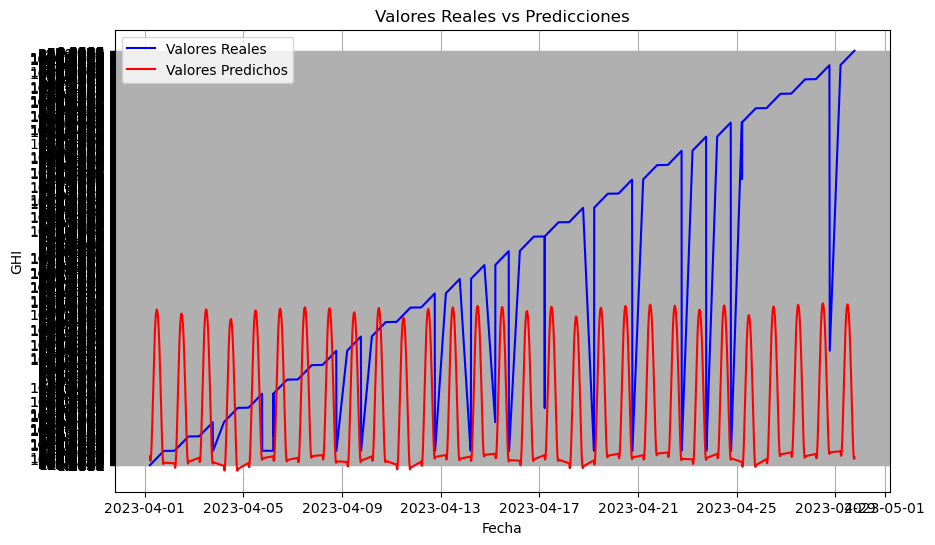

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(test_set_filtered['ds'], test_set_filtered['y'], label='Valores Reales', color='blue')
plt.plot(predict_subset['ds'], predict_subset['yhat'], label='Valores Predichos', color='red')

plt.title('Valores Reales vs Predicciones')
plt.xlabel('Fecha')
plt.ylabel('GHI')
plt.legend()
plt.grid(True)
plt.show()


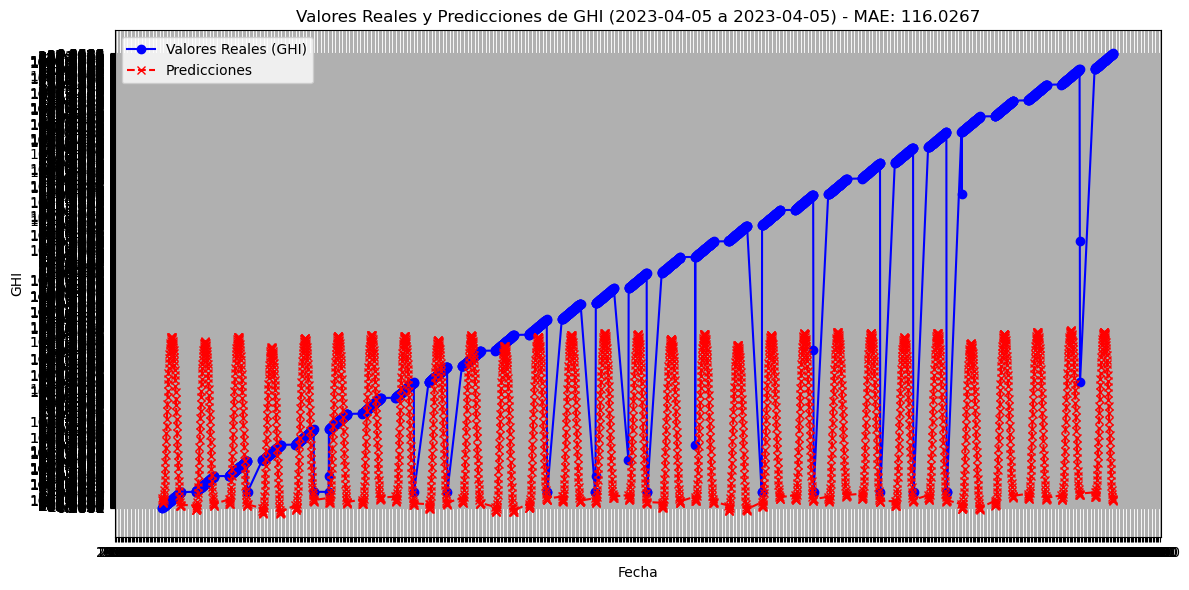

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define el rango de fechas para filtrar
start_date = '2023-04-01 05:00:00'  # Inicio deseado
end_date = '2023-04-30 18:30:00'    # Fin deseado

# Filtra los datos según el rango de fechas
test_set_filtered_date = test_set_filtered[(test_set_filtered['ds'] >= start_date) & (test_set_filtered['ds'] <= end_date)]
predict_subset_date = predict_subset[(predict_subset['ds'] >= start_date) & (predict_subset['ds'] <= end_date)]

real_values = test_set_filtered_date['y'].values
predicted_values = predict_subset_date['yhat'].values
mae = mean_absolute_error(real_values, predicted_values)

# Configura el gráfico
plt.figure(figsize=(12, 6))
plt.plot(test_set_filtered_date['ds'], test_set_filtered_date['y'], label='Valores Reales (GHI)', color='blue', marker='o', linestyle='-')
plt.plot(predict_subset_date['ds'], predict_subset_date['yhat'], label='Predicciones', color='red', marker='x', linestyle='--')

# Formato del título y etiquetas del eje X
plt.title(f'Valores Reales y Predicciones de GHI (2023-04-05 a 2023-04-05) - MAE: {mae:.4f}')
plt.xlabel('Fecha')
plt.ylabel('GHI')

# Configuración del formato de fechas en el eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Formato de horas en el eje X
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Intervalo de horas

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

